# TD 1.1 : un réseau (singleton) de neurone(s)

Dans ce TD nous allons toucher à Kéras mais de manière douce. Nous ne verrons qu'un réseau de neurones limité à un seul neurone. Avec en plus une fonction d'activation linéaire.

Bref, nous allons étudier la fonction $y=w.x+b$, tout simplement, où $w$ est le poids du neurone.

L'objet de ce TD est de comprendre ce que fait la fonction `fit` de Keras et de démystifier le machine learning.


## 1 Création d'un jeu de données

Il faut d'abord créer les données et importer toutes les librairies. Vous allez donc voir les données que nous voulons apprende. Il s'agit pour l'instant simplement de la fonction linéaire $y=7.x + 3$

Attention, prenez le temps de bien comprendre les dimensions des objets manipulés. Il peut s'agir pour vous de manipuler pour la première fois des matrices de Numpy.

shape of datax's : (100, 1)
shape of datay's : (100, 1)


Text(0, 0.5, 'Y (real values)')

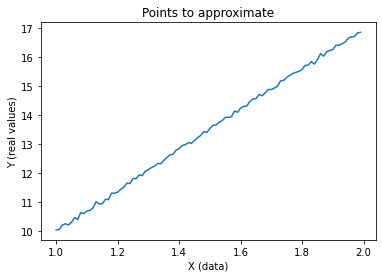

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import Callback

import numpy as np

NBPOINTS = 100
# generate data
datax = np.array([(x / 100 + 1) for x in range(0, NBPOINTS)]).reshape(-1, 1)
datay = datax * 7 + 3  # This applies on all the elements of the vector

# We add some noise to the perfect line
datay += np.random.normal(0, 0.05, NBPOINTS).reshape(100, 1)

# We have a vector of inputs as x (the "data")... e.g. a vector of vectors (each input is a vector)
# We have a vector of outputs as y (the "function to learn") e.g. a vector of vectors of output (each output is also a vector of number)
print("shape of datax's :", datax.shape)
print("shape of datay's :", datay.shape)
plt.plot(datax, datay)
plt.title("Points to approximate")
plt.xlabel("X (data)");
plt.ylabel("Y (real values)")


## 2 Préparation du modèle en Keras

L'apprentissage peut se faire exemple après exemple, mais également par groupe d'exemples (des batchs). L'avantage de l'utilisation de batch est multiple : cela permet par exemple de trouver immédiatement comment faire évoluer le réseau de neurones pour un ensemble de points. Cela permet également de jouer sur la performance des CPU et des GPU à paralleliser du code concernant des opérations matricielles. En interne, cela ajoute une dimension à toutes les opérations : le réseau apprend en même temps avec plusieurs exemples à la fois.

Pour comprendre ce qui se fait en interne, nous allons utiliser une fonction `callback` qui sera appelée après chaque traitement de `Batch` et chaque find d'`Epoch`. La class `History`, dans la suite, permet de mémoriser tous les paramètres actuels du modèle qui est en train d'apprendre. Cela nous permettra de rejouer tout l'apprentissage plus tard.

** Vous devez passer un peu de temps sur les documentations Keras **

- Remplissez la méthode `linear_model()` de manière à renvoyer un réseau de neurones ayant un seul neurone.
- Utilisez la méthode `compile(...)` de Kéras pour préparer le réseau de neurones
    - L'activation doit être linéaire
    - Vous devez spécifier la valeur de `input_dim`
    - Ajoutez l'initialisation aléatoire des poids dans le réseau 
    
- La fonction `getwb(layer)` permet de récupérer les valeurs des poids et biais d'une couche de neurones. Dans notre cas, cela permet de retourner `w` et `b` dans l'équation `y=w.x+b` 

In [20]:
MAXEPOCHS = 100
cmap = matplotlib.cm.get_cmap('magma')


def getwb(layer):
    [tmpw, tmpb] = layer.get_weights()
    return (tmpw[0][0], tmpb[0])


# Function that will be called after each epoch
# I use this function to memorize everything that happened during learning
class History(Callback):
    def __init__(self):
        self.history = {}
        self.batchHistory = []

    def addkeyvalue(self, k, v):
        if not k in self.history: self.history[k] = []
        self.history[k].append(v)

    def on_epoch_end(self, epoch, logs={}):
        print(logs)
        for k, v in logs.items():
            self.addkeyvalue(k, v)
        # Here, we gets the values of the unique neuron: its weights and its bias
        (w, b) = getwb(self.model)
        self.addkeyvalue('w', w);
        self.addkeyvalue('b', b)
        print(".", end="")

    def on_batch_end(self, batch, logs={}):
        self.batchHistory.append(getwb(self.model))


#Define the model: Just one neuron!!
def linear_model():
    layer = Dense(units=1, activation='linear', input_shape=(1,))
    model = Sequential(layer)
    model.compile(optimizer='sgd', loss='mae', metrics=['mae'])
    return model

print("Model defined")

Model defined


## 3 Utilisation de la méthode `fit`

Utilisez la méthode `fit` pour lancer l'apprentissage. 
- Utilisez la constante MAXEPOCHS pour limiter le nombre d'epochs de l'apprentissage
- Utilisez un `batch_size` de 1
- Précisez bien la fonction callback `callbacks=history`

In [57]:
# Cell that do the learning

model = linear_model()

history = [History()]

print("Values of the neuron before learning :", getwb(model))

model.fit(datax,datay,batch_size=16, epochs=400, validation_split=0.2, callbacks=history)

print("Values of the neuron after learning :", getwb(model))



Values of the neuron before learning : (1.6553844, 0.0)
Epoch 1/400
5/5 [==============================] - 0s 45ms/step - loss: 10.5081 - mae: 10.5081 - val_loss: 12.9125 - val_mae: 12.9125
{'loss': 10.400476455688477, 'mae': 10.400476455688477, 'val_loss': 12.912531852722168, 'val_mae': 12.912531852722168}
.Epoch 2/400
5/5 [==============================] - 0s 11ms/step - loss: 10.3965 - mae: 10.3965 - val_loss: 12.7304 - val_mae: 12.7304
{'loss': 10.253190040588379, 'mae': 10.253190040588379, 'val_loss': 12.730356216430664, 'val_mae': 12.730356216430664}
.Epoch 3/400
5/5 [==============================] - 0s 12ms/step - loss: 10.1767 - mae: 10.1767 - val_loss: 12.5482 - val_mae: 12.5482
{'loss': 10.105875015258789, 'mae': 10.105875015258789, 'val_loss': 12.548179626464844, 'val_mae': 12.548179626464844}
.Epoch 4/400
5/5 [==============================] - 0s 10ms/step - loss: 9.9685 - ma

## 4 Essayez différentes techniques

Utilisez toutes les cellules ci-dessous pour visualiser comment le réseau converge et apprend.
- Notez à quelle vitesse les valeurs `w` et `b` convergent vite
- Notez également à quel moment les valeurs se stabilisent

**Différentes techniques à essayer**
- quel impact a le *learning rate* (essayez `0.1, 0.3, 0.05, ...`) sur les figures ci-dessous ?
- quel impact a le *batch_size* sur le temps et les figures ?
- changez la heatmap pour afficher seulement le log du loss plutot que le loss

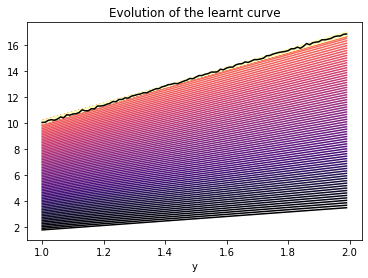

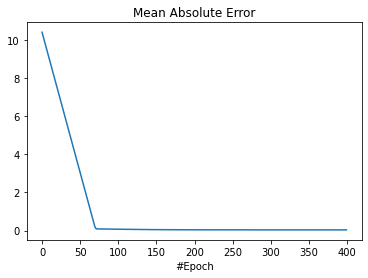

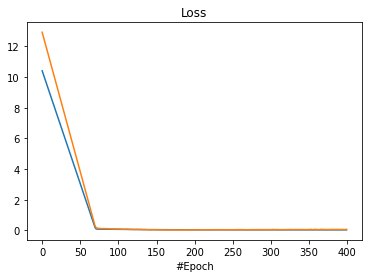

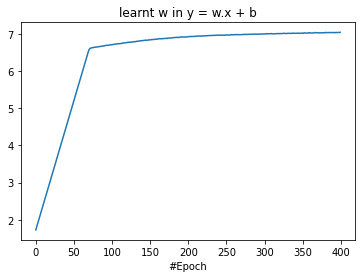

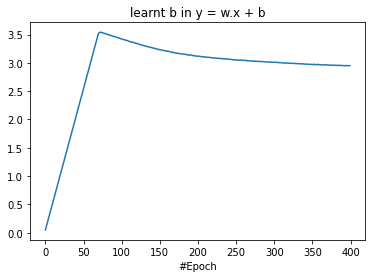

In [58]:
n = 0
plt.figure(n);
n += 1
plt.title("Evolution of the learnt curve")
plt.xlabel("x")
plt.xlabel("y")
wtmp = history[0].history['w']
btmp = history[0].history['b']
for i, w in enumerate(wtmp):
    out = datax * w + btmp[i]  # Gives what the model predicted for all outputs at epoch i
    # in fact this is exactly what model.predict(datax) would have given us after this epoch
    plt.plot(datax, out, color=cmap(i / MAXEPOCHS))
plt.plot(datax, datay, 'k')  # Plots the initial data

#Use the model


plt.figure(n);
n += 1
plt.title("Mean Absolute Error")
plt.xlabel("#Epoch")
plt.plot(history[0].history['mae'])

plt.figure(n);
n += 1
plt.title("Loss")
plt.xlabel("#Epoch")
plt.plot(history[0].history['loss'])
plt.plot(history[0].history['val_loss'])

plt.figure(n);
n += 1
plt.title("learnt w in y = w.x + b")
plt.xlabel("#Epoch")
plt.plot(history[0].history['w'])

plt.figure(n);
n += 1
plt.title("learnt b in y = w.x + b")
plt.xlabel("#Epoch")
plt.plot(history[0].history['b'])

#### Affichage simple de l'équation apprise

In [59]:
[w, a] = model.get_weights()
print("y={}.x + {}".format(w[0][0], a[0]))

y=7.045742988586426.x + 2.9524881839752197


### Construction des valeurs de la heatmap

In [60]:
ws = (min(history[0].history['w']) - 1, max(history[0].history['w']) + 1)
print("Values of w's are inside {}".format(ws))
bs = (min(history[0].history['b']) - 1, max(history[0].history['b']) + 1)
print("Values of b's are inside {}".format(bs))


# Very simple loss computation... Can be done with numpy much more efficiently
def getloss(X, Y, w, b):
    totalLoss = 0
    for i, x in enumerate(X):
        xx = x[0]
        my = xx * w + b
        loss = abs(my - Y[i][0])
        loss *= loss
        totalLoss += loss
    return totalLoss / len(X)


RESOLUTION = 100  # The map will be 100x100
hmap = np.zeros((RESOLUTION, RESOLUTION))
xticks = np.linspace(ws[0], ws[1], RESOLUTION, endpoint=False)
yticks = np.linspace(bs[0], bs[1], RESOLUTION, endpoint=False)
xi = 0
for xx in xticks:
    yi = 0
    for yy in yticks:
        hmap[yi, xi] = getloss(datax, datay, xx, yy)
        yi += 1
    xi += 1
getloss(datax, datay, 7, 3)

Values of w's are inside (0.7251344919204712, 8.045742988586426)
Values of b's are inside (-0.9500000029802322, 4.539996862411499)


0.0025213320314154187

### Affichage de la HeapMap du loss

Cette partie permet de voir l'évolution des valeurs `w` et `b` au cours de l'apprentissage, en représentant les valeurs après chaque *batch* et/ou après chaque *epoch*

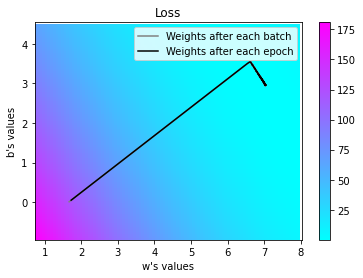

In [66]:
# Getting a picture of the moves of the search
fig, ax = plt.subplots()

minz = hmap.min()
maxz = hmap.max()
c = ax.pcolormesh(xticks, yticks, hmap, cmap='cool', vmin=minz, vmax=maxz)
ax.set_title('Loss')
plt.xlabel('w\'s values')
plt.ylabel('b\'s values')
# set the limits of the plot to the limits of the data
ax.axis([ws[0], ws[1], bs[0], bs[1]])
fig.colorbar(c, ax=ax)
plt.plot([x[0] for x in history[0].batchHistory], [x[1] for x in history[0].batchHistory], color='gray')
plt.plot([xx for xx in history[0].history['w']], [xx for xx in history[0].history['b']], color='black')
plt.legend(['Weights after each batch', 'Weights after each epoch'])
plt.show()


## 4 refaire tout l'apprentissage sans keras

Comment reprendre tout directement en python, depuis `datax`et `datay` pour simuler exactement ce que fait la méthode `fit` en passant chaque exemple, calculer le `loss` et mettre à jour `w` et `b` en respectant le learning rate donné. Vous spécialiserez votre méthode pour apprendre uniquement les fonctions `y=w.x+b` sans forcément viser des résultats génériques.
